In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
from scipy.integrate import solve_ivp
import nbinteract as nbi

In [2]:
%matplotlib notebook
plt.style.use('seaborn')

<IPython.core.display.Javascript object>


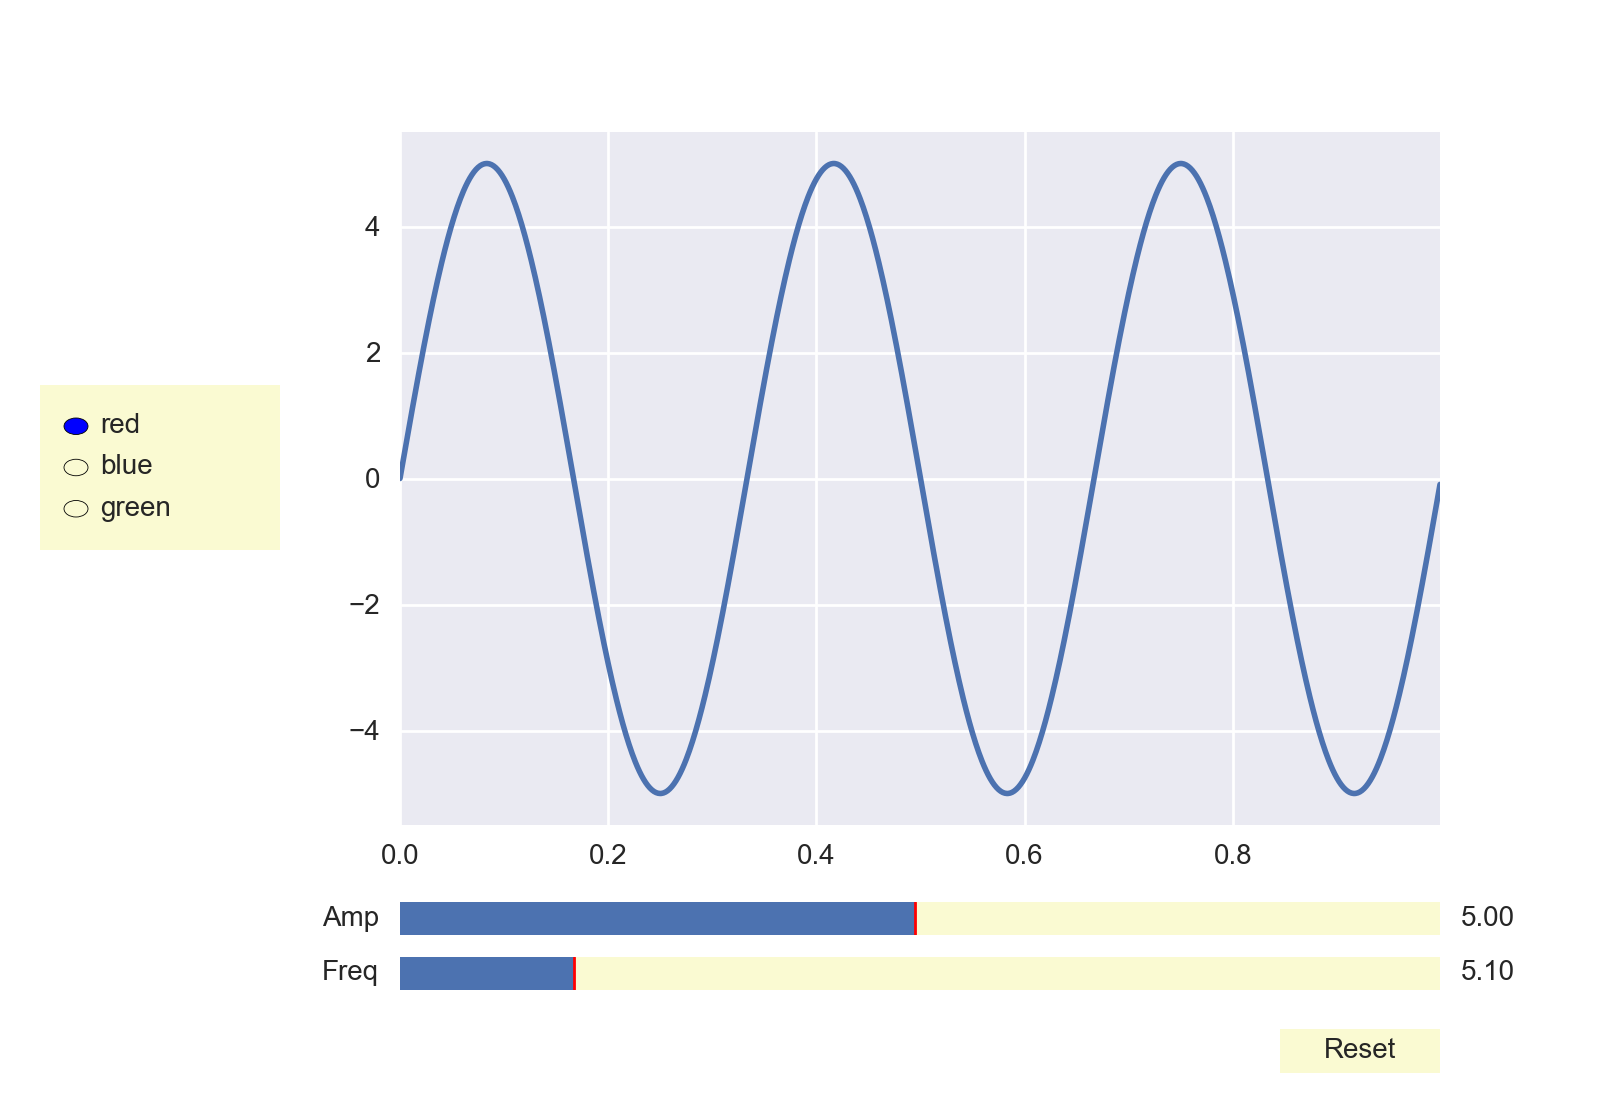

In [3]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
delta_f = 5.0
s = a0 * np.sin(2 * np.pi * f0 * t)
l, = plt.plot(t, s, lw=2)
ax.margins(x=0)

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0, valstep=delta_f)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()


sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()

SIRF model:

$\frac{dS}{dt} = -\beta IS$

$\frac{dI}{dt} = \beta IS -\gamma I$

$\frac{dR}{dt} = \gamma (1-\delta) I$

$\frac{dF}{dt} = \gamma \delta I$

In [18]:
def SIRF(I0,beta,gamma,delta):
    y0 = np.array([1-I0,I0,0,0])
    t_eval = np.arange(365)
    def func(t,y,beta,gamma,delta):
        return np.array([-beta*y[0]*y[1],beta*y[0]*y[1]-gamma*y[1],gamma*(1-delta)*y[1],gamma*delta*y[1]])
    return solve_ivp(func,(0,365),y0,t_eval=t_eval,args=(beta,gamma,delta))

In [30]:
def plot_SIRF(I0,beta,gamma,delta):
    labels = ['Susceptible','Infected','Recovered','Died']
    fig = plt.figure()
    sol = SIRF(I0,beta,gamma,delta)
    for i in range(4):
        plt.plot(sol.t,sol.y[i],label=labels[i])
    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


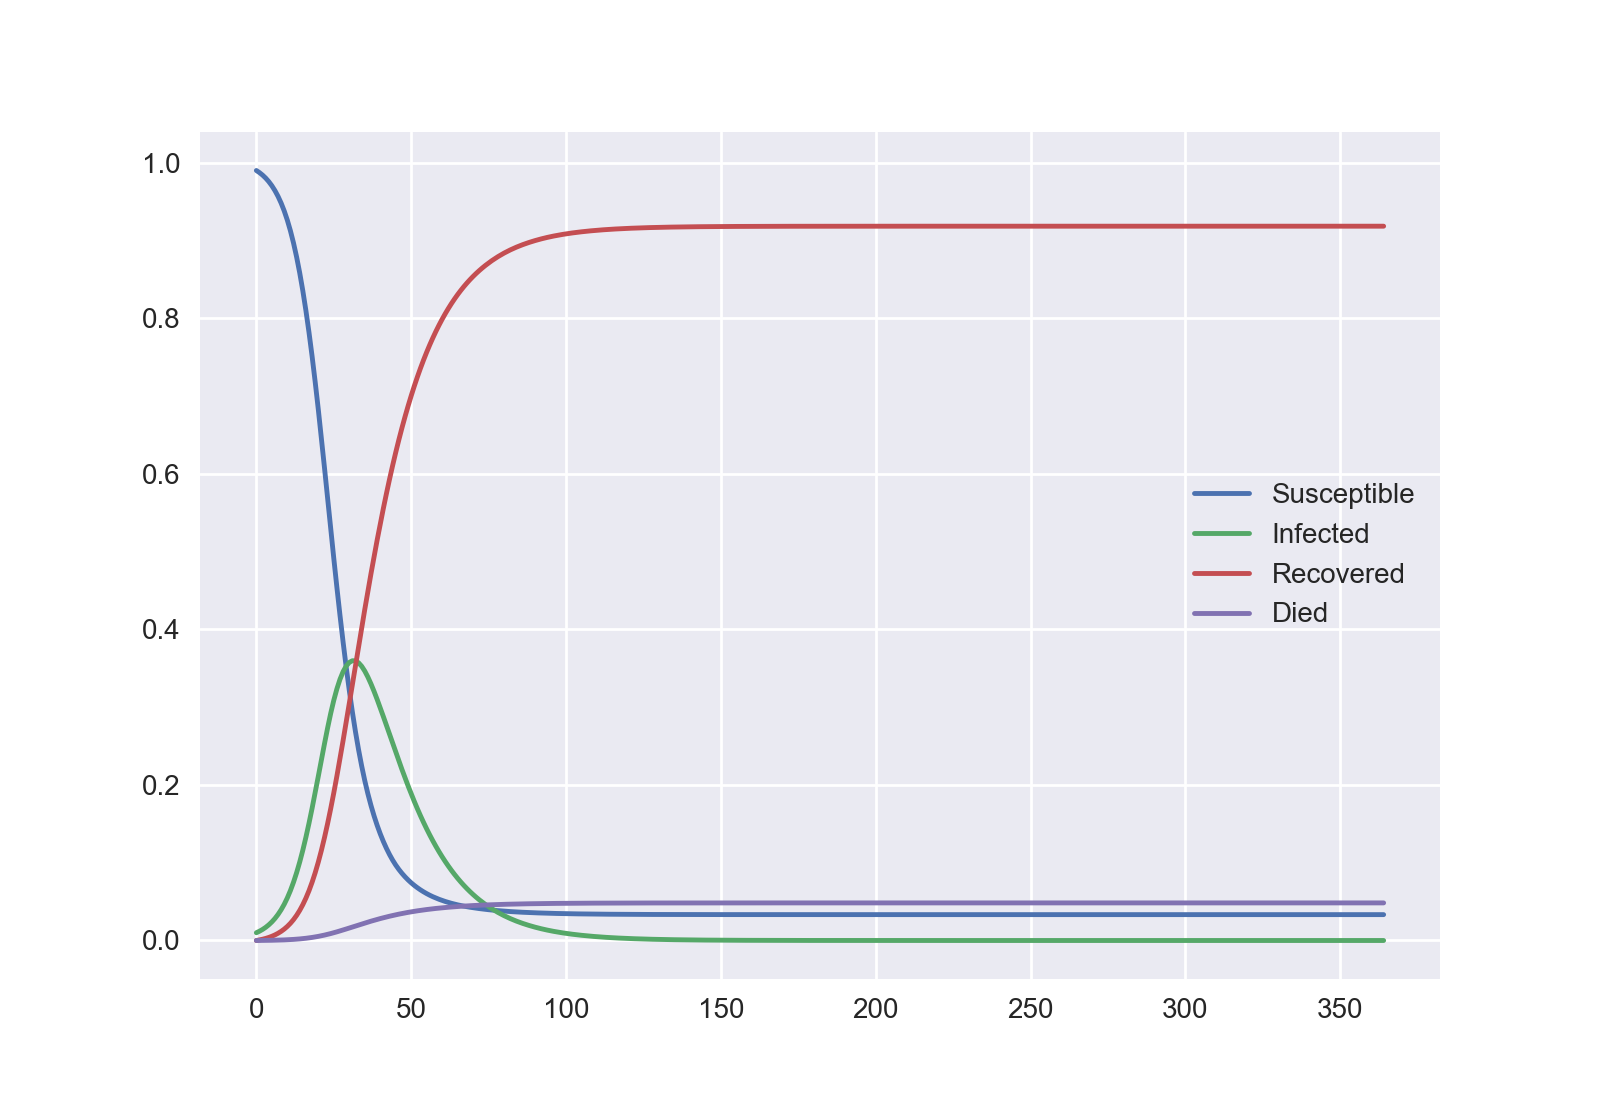

In [34]:
plot_SIRF(1e-2,3.5/14,1/14,.05)

In [5]:
nbi.publish('hjrrockies/eigenfun/master','SIR.ipynb')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'SIR.ipynb'.
Converting notebook...



Successfully converted!

<a href="SIR.html" target="_blank" download>Click to download your webpage.</a>

To host your webpage, see the documentation:
<a href="https://www.nbinteract.com/tutorial/tutorial_publishing.html"
        target="_blank">
    https://www.nbinteract.com/tutorial/tutorial_publishing.html
</a>


In [6]:
nbi.line?